In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
url='iris.csv'
iris=pd.read_csv(url)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.drop(['Id','Species'],axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
iris_std=pd.DataFrame(scale(iris), columns=list(iris.columns))
iris_std.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


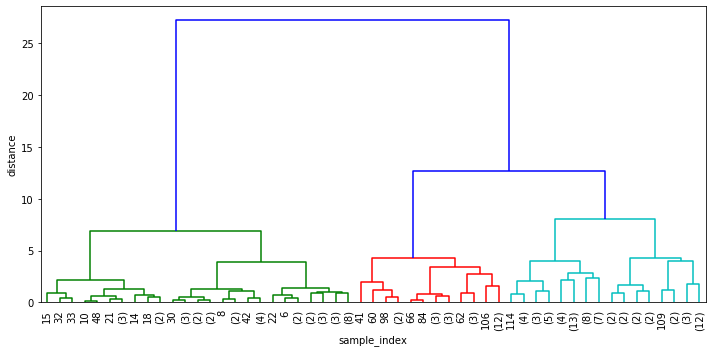

In [6]:
plt.figure(figsize=(10,5))
plt.xlabel('sample_index')
plt.ylabel('distance')
z = linkage(iris_std,method='ward')
dendrogram(z,leaf_rotation=90,p = 5,color_threshold=10,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [7]:
iris_std=iris_std[['SepalLengthCm','SepalWidthCm']]
iris_std.describe()

,SepalLengthCm,SepalWidthCm
count,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16
std,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00
25%,-9.006812e-01,-5.877635e-01
50%,-5.250608e-02,-1.249576e-01
75%,6.745011e-01,5.692513e-01
max,2.492019e+00,3.114684e+00


In [8]:
for n_clusters in range(2,20):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(iris_std)
    silhouette_avg = silhouette_score(iris_std,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)

For n_clusters = 2 The average silhouette_score is: 0.4459060947252491
For n_clusters = 3 The average silhouette_score is: 0.43625503443265584
For n_clusters = 4 The average silhouette_score is: 0.41962617423723664
For n_clusters = 5 The average silhouette_score is: 0.35319063401403256
For n_clusters = 6 The average silhouette_score is: 0.3626260050791639
For n_clusters = 7 The average silhouette_score is: 0.386689215046107
For n_clusters = 8 The average silhouette_score is: 0.39589327272812663
For n_clusters = 9 The average silhouette_score is: 0.3914603601027887
For n_clusters = 10 The average silhouette_score is: 0.3790113833745723
For n_clusters = 11 The average silhouette_score is: 0.4028929350818648
For n_clusters = 12 The average silhouette_score is: 0.4100227082752638
For n_clusters = 13 The average silhouette_score is: 0.39617762525720146
For n_clusters = 14 The average silhouette_score is: 0.38519438596551697
For n_clusters = 15 The average silhouette_score is: 0.388583844490

In [9]:
cluster_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
cluster_labels = cluster_model.fit_predict(iris_std)
silhouette_avg = silhouette_score(iris_std,cluster_labels,metric='euclidean')

In [10]:
silhouette_avg

0.43625503443265584

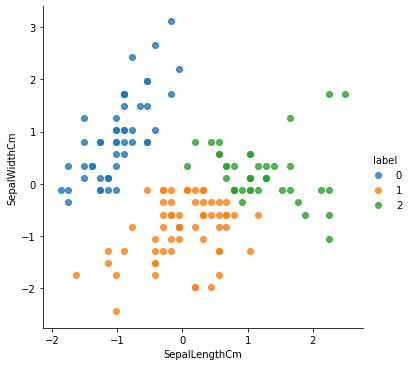

In [11]:
iris_std['label']=cluster_labels
sns.lmplot(fit_reg=False,x='SepalLengthCm',y='SepalWidthCm', data=iris_std, hue='label')

For finding out k-means cluster we have imported k-means cluster from sklearn library 

we are testing cluster from 2-20

and we are running a loop on k which is value between 2-20 
we are running k-mean for each of value 

In [12]:
n_clusters = range(2,20)
n_clusters

range(2, 20)

In [13]:
for k in n_clusters:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(iris_std[['SepalLengthCm','SepalWidthCm']])
    print(k,silhouette_score(iris_std[['SepalLengthCm','SepalWidthCm']],kmeans.labels_))

2 0.44429469370665686
3 0.43479013999499483
4 0.4193010202632046
5 0.39825707184867376
6 0.41291856979276587
7 0.40317175716725234
8 0.4167516528047589
9 0.4258686951485557
10 0.4131097729306476
11 0.40660480161628315
12 0.4253127474133598
13 0.4166716526751601
14 0.4220613316579606
15 0.4199216426965621
16 0.3988580814178421
17 0.42810866722798757
18 0.3773446021236131
19 0.3857470856214211


In [14]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(iris_std[['SepalLengthCm','SepalWidthCm']])
label2=kmeans.labels_
iris_std['label2']=label2
iris_std

,SepalLengthCm,SepalWidthCm,label,label2
0,-0.900681,1.032057,0,0
1,-1.143017,-0.124958,0,0
2,-1.385353,0.337848,0,0
3,-1.506521,0.106445,0,0
4,-1.021849,1.263460,0,0
...,...,...,...,...
145,1.038005,-0.124958,2,1
146,0.553333,-1.281972,1,1
147,0.795669,-0.124958,2,1
148,0.432165,0.800654,2,1


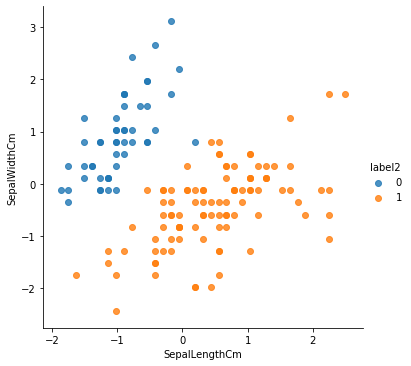

In [15]:
sns.lmplot(fit_reg=False,x='SepalLengthCm',y='SepalWidthCm', data=iris_std, hue='label2')

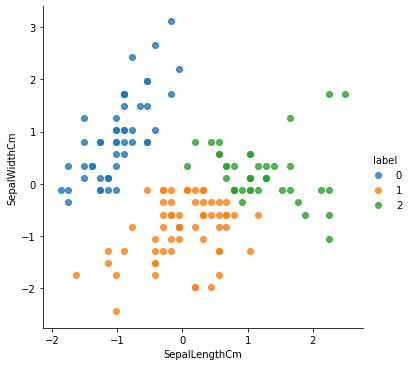

In [16]:
sns.lmplot(fit_reg=False,x='SepalLengthCm',y='SepalWidthCm', data=iris_std, hue='label')

In [17]:
iris_scale=pd.DataFrame(scale(iris), columns=list(iris.columns))
for k in n_clusters:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(iris_scale)
    print(k,silhouette_score(iris_scale,kmeans.labels_))

2 0.580184463257396
3 0.4589717867018717
4 0.3904820205538904
5 0.34805236242232845
6 0.32694416387034464
7 0.3441214093684859
8 0.33170534583553296
9 0.3409361455649805
10 0.34392250319082557
11 0.35287571586016014
12 0.3618566617566086
13 0.3599573985535823
14 0.33653010874639117
15 0.3538333822808928
16 0.34252395975626143
17 0.3415095567542924
18 0.31381055134216723
19 0.33241894877372846
